# 1. Face recognition using manual features

<img src="https://raw.githubusercontent.com/cmusatyalab/openface/master/images/summary.jpg" width="500"/>

# Face Normalization -> Detect, Transform, Crop

In [1]:
import cv2
import pandas as pd
import glob

In [2]:
homogeneas = glob.glob("faces-datamad0120/todas_heterogeneas/**/*.jpg")

In [3]:
df = pd.DataFrame({
    "path":homogeneas
})
df.head()

,path
0,faces-datamad0120/todas_heterogeneas/Alex/8.jpg
1,faces-datamad0120/todas_heterogeneas/Alex/9.jpg
2,faces-datamad0120/todas_heterogeneas/Alex/4.jpg
3,faces-datamad0120/todas_heterogeneas/Alex/5.jpg
4,faces-datamad0120/todas_heterogeneas/Alex/7.jpg


In [4]:
df["GT"] = df.path.apply(lambda x: x.split("/")[2])
df.head()

,path,GT
0,faces-datamad0120/todas_heterogeneas/Alex/8.jpg,Alex
1,faces-datamad0120/todas_heterogeneas/Alex/9.jpg,Alex
2,faces-datamad0120/todas_heterogeneas/Alex/4.jpg,Alex
3,faces-datamad0120/todas_heterogeneas/Alex/5.jpg,Alex
4,faces-datamad0120/todas_heterogeneas/Alex/7.jpg,Alex


In [5]:
df.GT.value_counts()

Laura          10
Amanda         10
Sergio         10
Maic           10
Villamor       10
Fernando       10
Alex           10
Guille_D       10
Xabi           10
Lucia          10
Patri          10
Jose_Manuel    10
Cris           10
Santi          10
Guille_M       10
Ivan           10
Fabian         10
Ricardo        10
Eli             9
Jose_Vidal      9
Irene           9
Edu_G           2
Marlena         1
Name: GT, dtype: int64

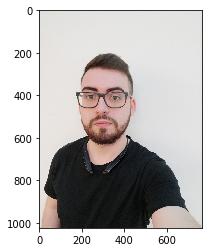

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

img = cv2.imread("faces-datamad0120/todas_homogeneas/Alex/8.jpg") 
# Reorganize numpy array for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
# https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

# Face classifier model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')



(1024, 768)


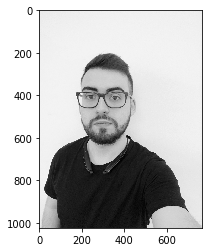

In [8]:

img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img_bw.shape)
plt.imshow(img_bw, cmap="gray")

[[122 263 356 356]]


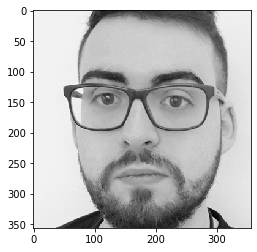

In [9]:
faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
print(faces)
x,y,w,h = faces[0]
plt.imshow(img_bw[y:y+h,x:x+w],cmap="gray")

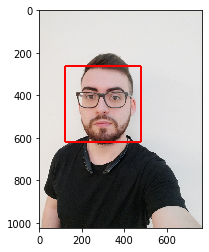

In [10]:
im_col = cv2.rectangle(img, (x,y), (x+w,y+h),(255, 0, 0) ,5)
plt.imshow(im_col)
  

In [11]:
def getFace(img):
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)

    # Ensure there is at least 1 face
    if len(faces) > 0:
        x,y,w,h = faces[0]
        return img_bw[y:y+h,x:x+w]
    else:
        raise ValueError("No face found")

        
        
def openImageAndDetectFaces(path):
    img = cv2.imread(path) 
    try:
        print(f"Detecting faces in {path}")
        face_patch = getFace(img)
        return face_patch
    except ValueError as e:
        print(f"Not found image in {path}")
        return None

    

In [12]:
df["face"] = df.path.apply(lambda path: openImageAndDetectFaces(path))

Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/8.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/9.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/4.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/5.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/7.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/6.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/2.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/3.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/1.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Alex/0.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Edu_G/8.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Edu_G/7.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Lucia/8.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Lucia/9.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Lu

Detecting faces in faces-datamad0120/todas_heterogeneas/Xabi/6.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Xabi/2.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Xabi/3.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Xabi/1.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Xabi/0.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/8.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/9.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/4.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/5.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/7.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/6.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/2.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/3.jpg
Detecting faces in faces-datamad0120/todas_heterogeneas/Laura/1.jpg
Detecting faces in faces-datamad0120/todas_heterogene

In [13]:
df.head()

,path,GT,face
0,faces-datamad0120/todas_homogeneas/Alex/8.jpg,Alex,"[[228, 228, 228, 228, 227, 228, 227, 228, 228,..."
1,faces-datamad0120/todas_homogeneas/Alex/9.jpg,Alex,"[[228, 228, 228, 229, 229, 229, 229, 228, 228,..."
2,faces-datamad0120/todas_homogeneas/Alex/4.jpg,Alex,"[[230, 229, 229, 229, 229, 228, 229, 229, 228,..."
3,faces-datamad0120/todas_homogeneas/Alex/5.jpg,Alex,"[[229, 229, 229, 229, 229, 229, 229, 230, 229,..."
4,faces-datamad0120/todas_homogeneas/Alex/7.jpg,Alex,"[[228, 228, 228, 228, 229, 229, 229, 228, 228,..."


In [14]:
df["shapes"] = df.face.apply(lambda face: face.shape)

In [15]:
df.head()

,path,GT,face,shapes
0,faces-datamad0120/todas_homogeneas/Alex/8.jpg,Alex,"[[228, 228, 228, 228, 227, 228, 227, 228, 228,...","(344, 344)"
1,faces-datamad0120/todas_homogeneas/Alex/9.jpg,Alex,"[[228, 228, 228, 229, 229, 229, 229, 228, 228,...","(328, 328)"
2,faces-datamad0120/todas_homogeneas/Alex/4.jpg,Alex,"[[230, 229, 229, 229, 229, 228, 229, 229, 228,...","(364, 364)"
3,faces-datamad0120/todas_homogeneas/Alex/5.jpg,Alex,"[[229, 229, 229, 229, 229, 229, 229, 230, 229,...","(370, 370)"
4,faces-datamad0120/todas_homogeneas/Alex/7.jpg,Alex,"[[228, 228, 228, 228, 229, 229, 229, 228, 228,...","(370, 370)"


[[16.7837744  14.77803485 14.05407347 ...  7.68923072  6.72675402
   6.65528649]
 [12.73081952 12.56256655 12.77338033 ...  7.5805251   7.55971258
   6.70110843]
 [14.03641545 13.02844629 12.56103034 ...  6.52661986  7.1963717
   5.7717479 ]
 ...
 [ 8.82350428  8.76314949  7.55392624 ...  5.48381757  4.76265023
   6.13463659]
 [ 8.34662118  8.2554505   7.70514892 ...  5.53009947  5.94811696
   5.68765056]
 [ 8.430195    8.68559311  7.85646241 ...  6.01116657  6.38487008
   5.05319865]]


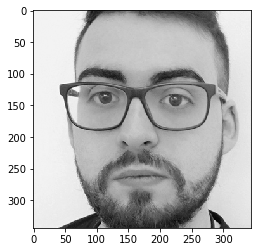

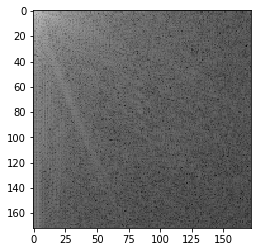

In [16]:
import numpy as np

face = df.face.iloc[0]
plt.figure()
plt.imshow(face, cmap="gray")

fft2d = np.log(np.abs(np.fft.fft2(face)))
fft2d = fft2d[0:len(fft2d)//2,0:len(fft2d)//2]

print(fft2d)
plt.figure()

plt.imshow(fft2d, cmap="gray")
fvector = fft2d[0:60,0:60]


In [79]:
from scipy.fftpack import dct
numfeats = 80
import numpy as np
def getFeats(face):
    try:
        fft = np.log10(np.abs(np.fft.fft2(face)))
        w = fft.shape[0]//2
        fft = fft[3:w+3,3:w+3]
        feats = fft[:numfeats,:numfeats]
        q = np.hstack(feats)
        if len(q) != numfeats*numfeats:
            plt.imshow(face)
            print("Invalid face to get features")
            return None
        return q
    except:
        print("Cannot extract features")
        return None
        

In [80]:
getFeats(face).shape

(6400,)

Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features
Invalid face to get features


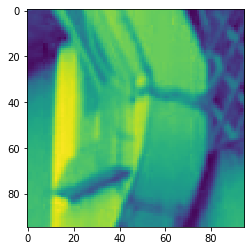

In [81]:
df["feats"] = df["face"].apply(lambda face: getFeats(face))

In [85]:
# Filter out null faces that cannot extract features
df = df[~df["feats"].isnull()]


In [86]:
df.head()

,path,GT,face,feats
0,faces-datamad0120/todas_heterogeneas/Alex/8.jpg,Alex,"[[108, 111, 108, 109, 107, 107, 110, 108, 110,...","[4.768539952195106, 4.292304298867701, 4.51489..."
1,faces-datamad0120/todas_heterogeneas/Alex/9.jpg,Alex,"[[171, 173, 174, 171, 169, 169, 169, 169, 166,...","[5.503641553308212, 4.980486278697435, 5.31491..."
2,faces-datamad0120/todas_heterogeneas/Alex/4.jpg,Alex,"[[181, 179, 173, 172, 170, 163, 169, 172, 175,...","[5.139515794472955, 5.274839983507149, 5.03525..."
3,faces-datamad0120/todas_heterogeneas/Alex/5.jpg,Alex,"[[200, 199, 198, 202, 200, 201, 200, 201, 202,...","[5.579663548977873, 5.385126535157172, 5.40079..."
4,faces-datamad0120/todas_heterogeneas/Alex/7.jpg,Alex,"[[171, 175, 171, 176, 180, 180, 176, 179, 180,...","[5.239129375478698, 5.33075733703686, 4.834449..."


In [87]:
df.GT.value_counts()

Patri          10
Lucia          10
Sergio         10
Maic           10
Guille_M       10
Santi          10
Cris           10
Guille_D       10
Jose_Manuel    10
Fernando        9
Alex            9
Xabi            9
Laura           9
Eli             9
Ivan            9
Amanda          8
Fabian          8
Villamor        6
Irene           6
Jose_Vidal      5
Ricardo         5
Edu_G           2
Name: GT, dtype: int64

# Training a RandomForest model

In [88]:
X = df.feats
y = df.GT

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [90]:
print(y_test.iloc[0].index)
print(df.iloc[156])

<built-in method index of str object at 0x121e86e30>
path     faces-datamad0120/todas_heterogeneas/Fabian/2.jpg
GT                                                  Fabian
face     [[70, 55, 59, 53, 59, 59, 56, 50, 50, 47, 53, ...
feats    [5.158376936456393, 5.253520411951205, 4.89256...
Name: 177, dtype: object


In [91]:
from scipy.spatial.distance import cosine

def getPrediction(vect):
    try:
        diffs = X_train.apply(lambda x: cosine(x,vect))
        predictIndex = diffs.sort_values(ascending=True).index[0]
        gt = df.iloc[predictIndex].GT
        return gt
    except:
        return "Cannot recognize"

In [92]:

pd.DataFrame({
    "GT":y_test,
    "prediction": X_test.apply(lambda x: getPrediction(x))
})

,GT,prediction
57,Amanda,Jose_Vidal
185,Ivan,Cannot recognize
67,Cris,Fernando
66,Cris,Jose_Vidal
17,Lucia,Maic
52,Amanda,Amanda
36,Maic,Jose_Vidal
109,Santi,Jose_Vidal
83,Irene,Maic
4,Alex,Maic


# Now with a proper knn model

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#neigh = KNeighborsClassifier(n_neighbors=5)
#neigh = SVC(kernel="poly")
neigh = RandomForestClassifier()

XX = np.vstack(X_train)
print(XX)
print(XX.shape)
neigh.fit(XX, y_train)

[[4.87693219 5.20011436 5.29309054 ... 3.2920575  2.96254466 3.68367963]
 [4.74312637 4.87169864 4.77151699 ... 1.60457186 2.12403357 2.59992856]
 [4.71001335 4.95215295 5.15514271 ... 3.59304757 3.27928716 3.45255327]
 ...
 [5.33789101 5.67693746 5.50467775 ... 3.5145396  3.02149221 3.55306685]
 [4.84075641 5.16966917 4.8207725  ... 2.68096299 2.72453153 2.89427789]
 [5.50364155 4.98048628 5.31491754 ... 3.45202556 3.28888544 3.33716018]]
(147, 6400)


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
XXT = np.vstack(X_test)
print(XXT.shape)
y_pred = neigh.predict(XXT)

(37, 6400)


In [105]:
pd.DataFrame({
    "GT":y_test,
    "prediction":y_pred
})


,GT,prediction
57,Amanda,Fernando
185,Ivan,Ivan
67,Cris,Guille_D
66,Cris,Maic
17,Lucia,Lucia
52,Amanda,Laura
36,Maic,Patri
109,Santi,Guille_D
83,Irene,Cris
4,Alex,Sergio


In [106]:
def whoIsThisGuy(path,faceIndex=0):
    img = cv2.imread(path) 
    img_bw = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(img_bw, 1.1, 4)
    x,y,w,h = faces[faceIndex]
    lau = img_bw[y:y+h,x:x+w]
    print(neigh.predict([getFeats(lau)]))
    plt.imshow(lau, cmap="gray")

['Guille_D']


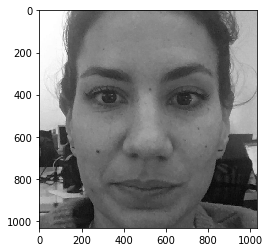

In [107]:
whoIsThisGuy("laura.jpg",1)

['Guille_D']


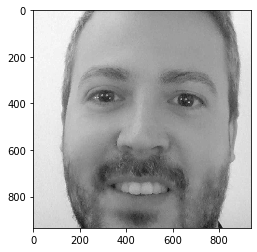

In [108]:
whoIsThisGuy("sergio.jpg")

['Maic']


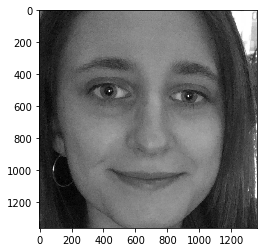

In [109]:
whoIsThisGuy("irene.jpg")